In [19]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

# load the data
df = pd.read_csv('/home/anjali/Documents/DM_LAB_CASESTUDY/lung _cancer.csv')

In [20]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [22]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [23]:
#Check for duplicates in the dataset
int(df.duplicated().sum())

33

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(276, 16)

In [26]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [27]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [28]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

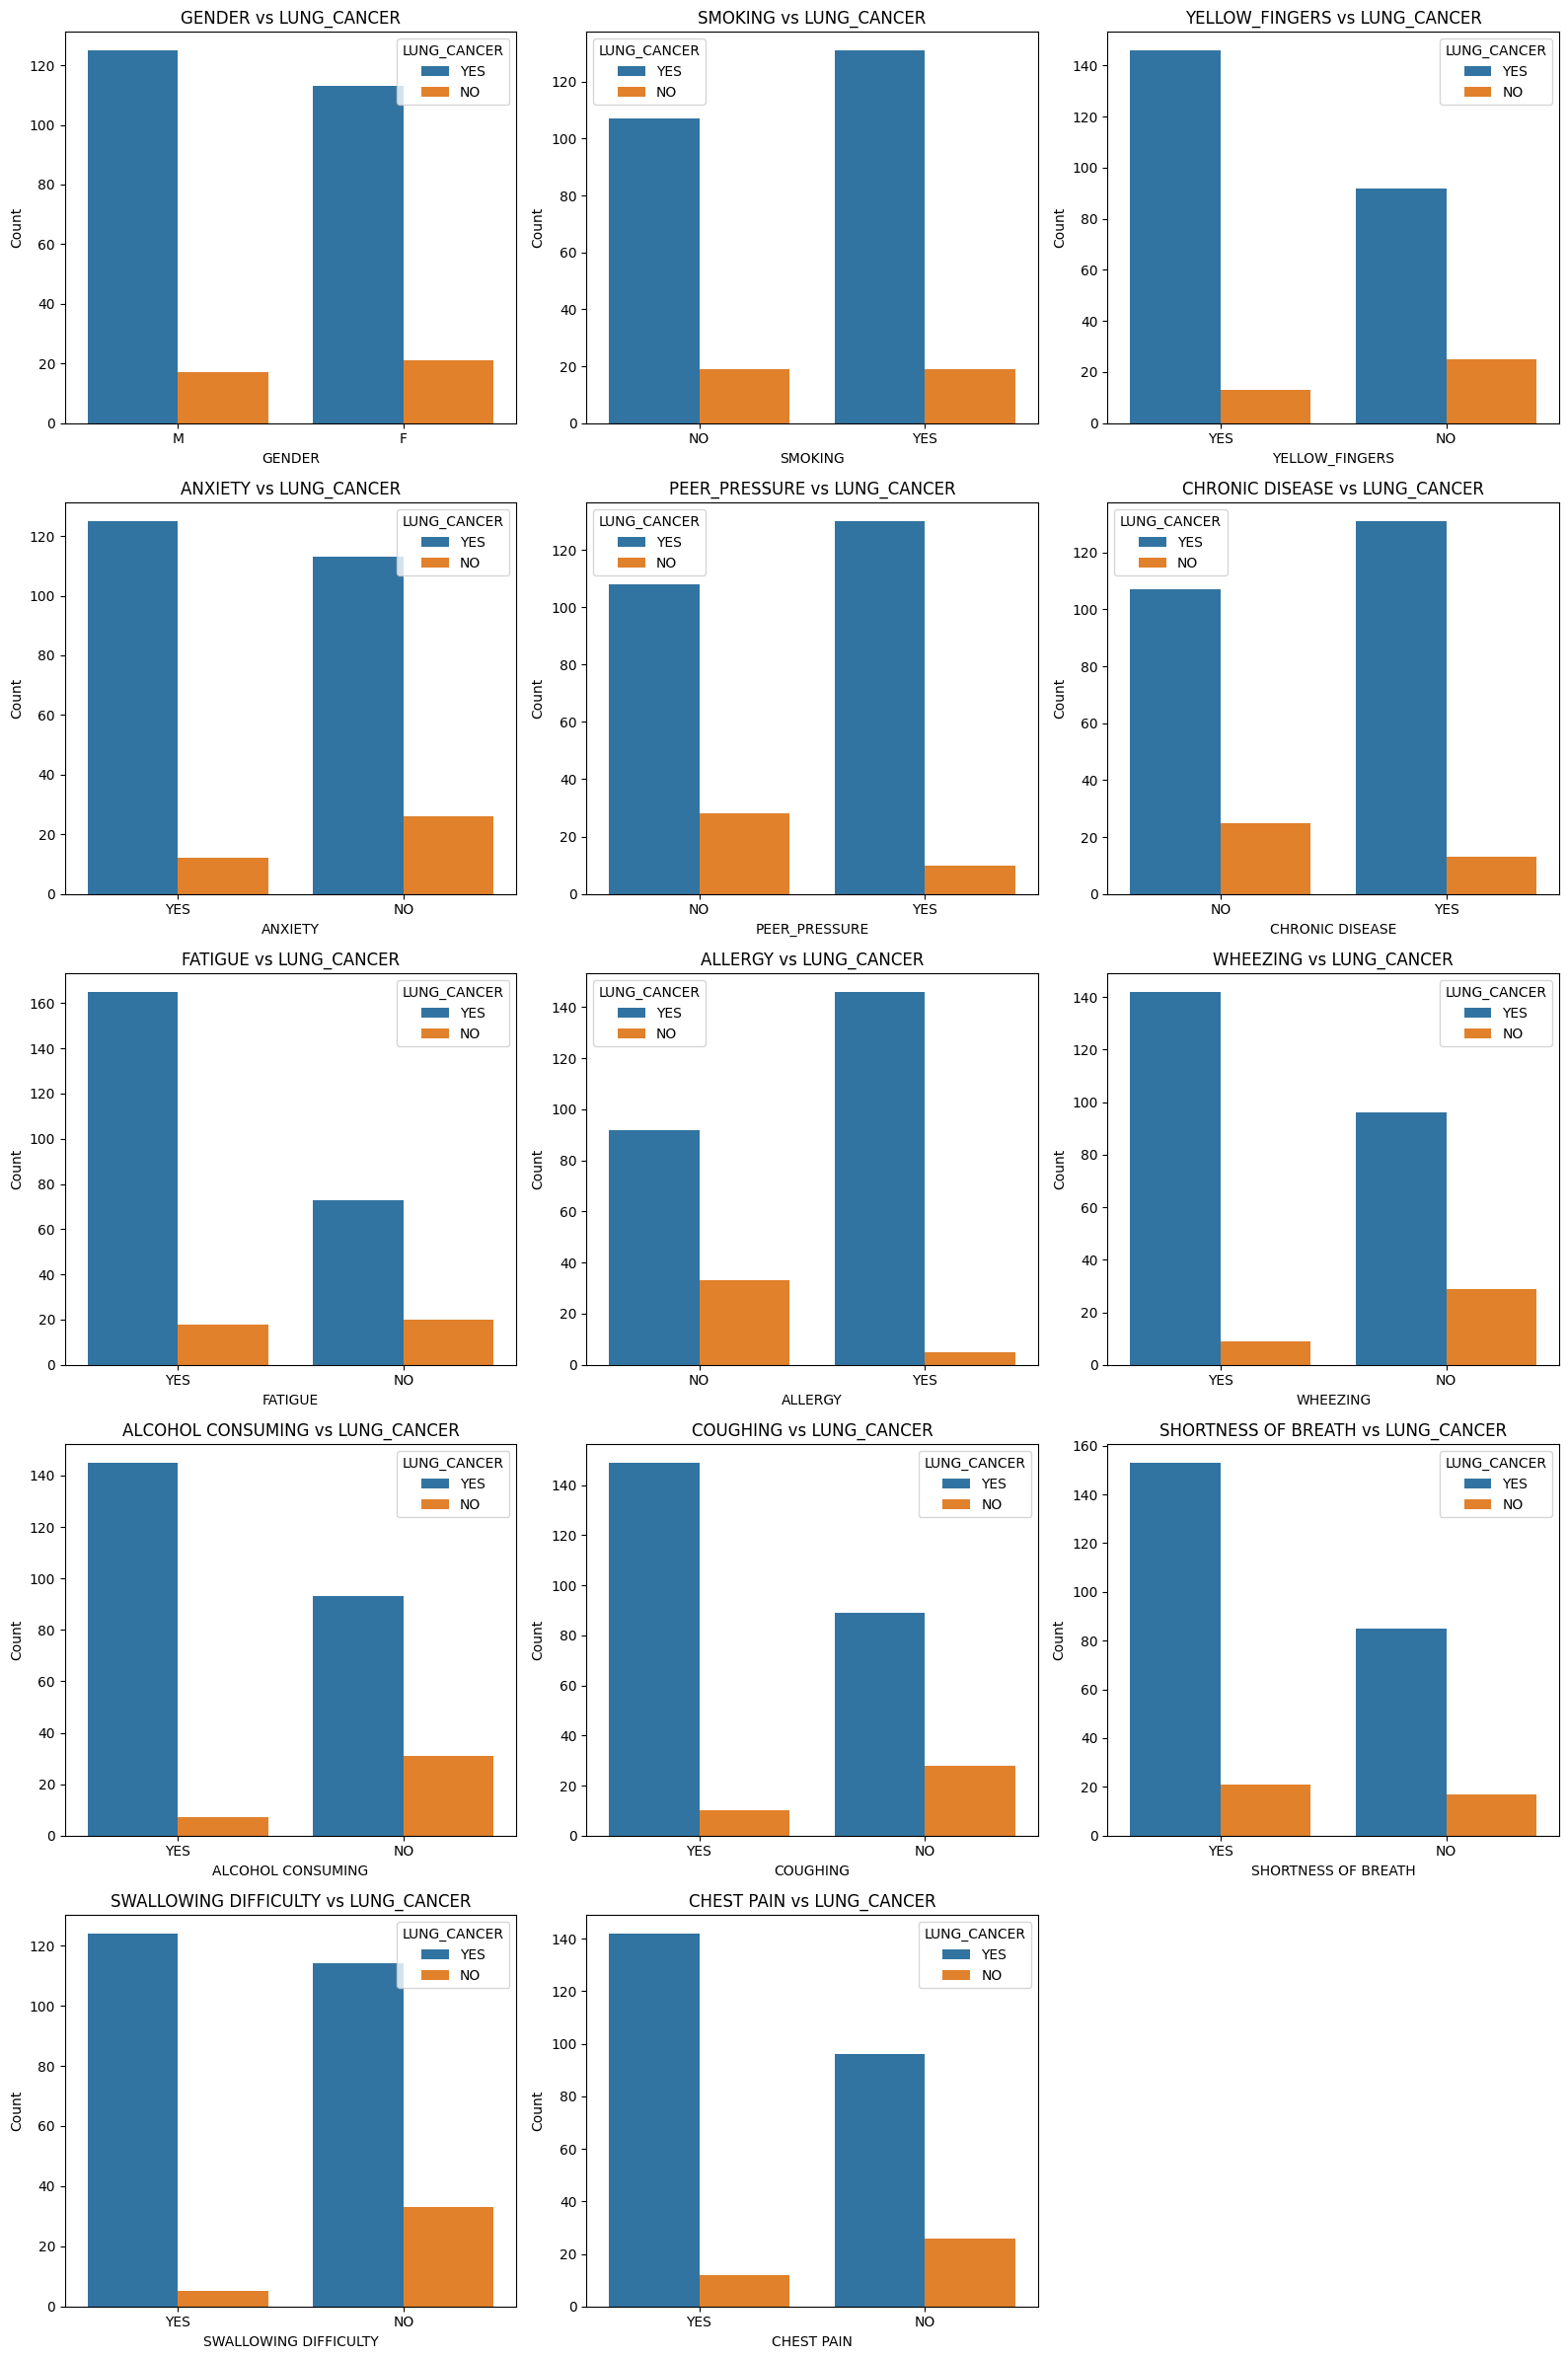

In [29]:

# Mapping for binary values to 'YES' and 'NO'
binary_mapping = {1: 'NO', 2: 'YES',}

# Apply the mapping to the relevant columns
binary_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                  'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                  'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                  'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for column in binary_columns:
    df[column] = df[column].map(binary_mapping)

# Set up the plotting configuration
plt.figure(figsize=(16,24))

# List of categorical columns (excluding the target column 'LUNG_CANCER')
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Number of rows and columns for the subplots
n_rows = 5
n_cols = 3

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=column, hue='LUNG_CANCER')
    plt.title(f'{column} vs LUNG_CANCER')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [30]:
encoder = LabelEncoder()
df['GENDER']=encoder.fit_transform(df['GENDER'])
df['SMOKING']=encoder.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=encoder.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=encoder.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=encoder.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=encoder.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE']=encoder.fit_transform(df['FATIGUE'])
df['ALLERGY']=encoder.fit_transform(df['ALLERGY'])
df['WHEEZING']=encoder.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=encoder.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=encoder.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=encoder.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=encoder.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=encoder.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


(M : 1,  F : 0,  YES : 1,  NO : 0)

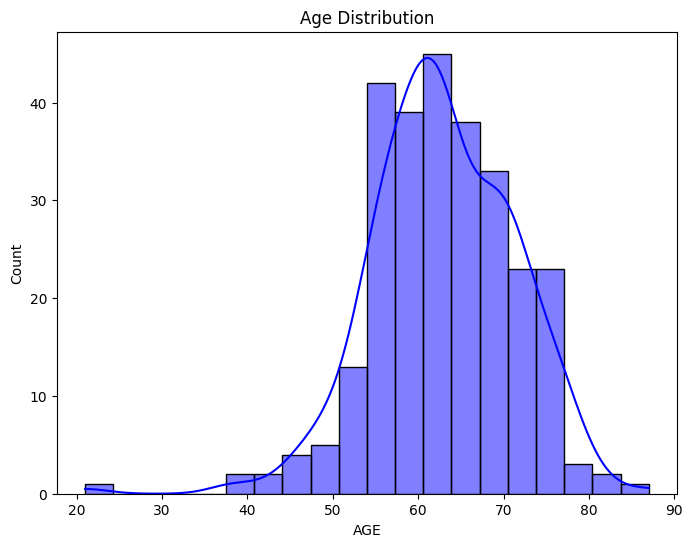

In [31]:

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', kde=True, color='blue')
plt.title('Age Distribution')
plt.show()


<Axes: ylabel='AGE'>

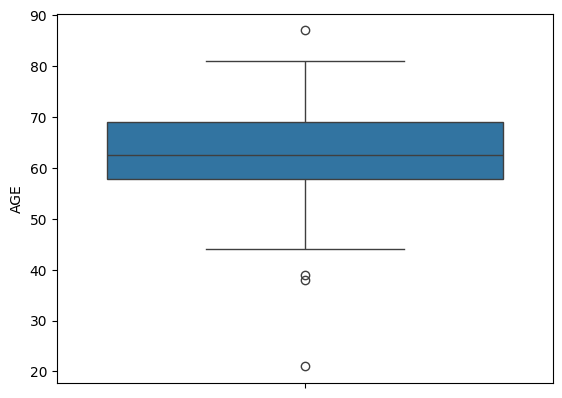

In [32]:
sns.boxplot(df['AGE'])

<Axes: ylabel='AGE'>

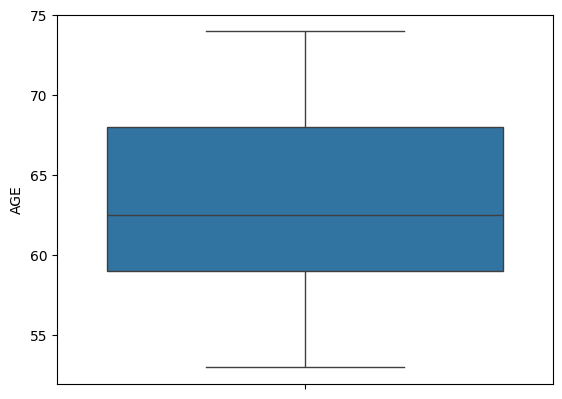

In [33]:
columns = ['AGE']
for col in columns:
    # Apply log transformation and handle potential errors (like log(0))
    
    
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    
    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

sns.boxplot(df['AGE'])

Text(0.5, 1.0, 'Class Distribution before SMOTE')

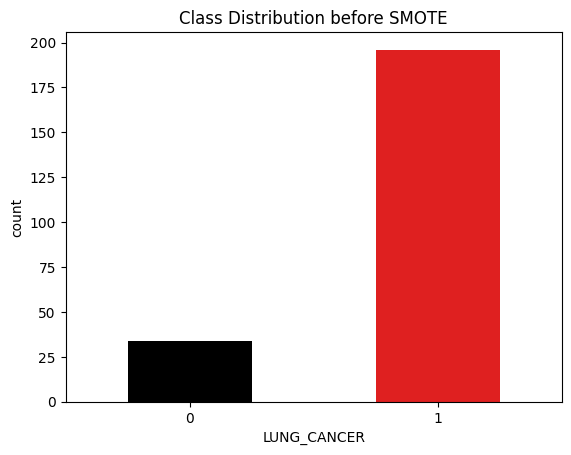

In [34]:
sns.countplot(x=df['LUNG_CANCER'], palette=['black', 'red'], width=0.5)
plt.title('Class Distribution before SMOTE')

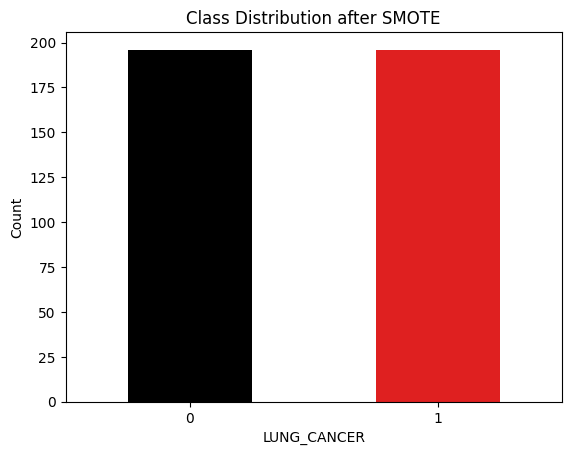

In [44]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X and y are your features and target respectively
# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Convert the resampled target to a DataFrame for plotting
df_resampled = pd.DataFrame(y_res, columns=['LUNG_CANCER'])

# Plot the class distribution of the resampled data with custom colors
sns.countplot(x='LUNG_CANCER', data=df_resampled, palette=['black', 'red'],width=0.5)
plt.title('Class Distribution after SMOTE')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Count')
plt.show()


In [36]:

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the standardized features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['LUNG_CANCER'] = y.values  # Add the target column back

# Print the summary statistics of the scaled DataFrame
print("Summary statistics of the scaled DataFrame:")
print(df_scaled.describe())
print('\n')

# Calculate mean and standard deviation for each attribute
attributes = ['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
              'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
              'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

means_before = df[attributes].mean()
std_before = df[attributes].std()
means_after = df_scaled[attributes].mean()
std_after = df_scaled[attributes].std()

# Print mean and standard deviation before and after standardization
print("Means and Standard Deviations Before and After Standardization:")
for attribute in attributes:
    mean_before = means_before[attribute]
    std_before_val = std_before[attribute]
    mean_after = means_after[attribute]
    std_after_val = std_after[attribute]
    
    print(f"Attribute: {attribute}")
    print(f"Mean Before: {mean_before:.2f}, Standard Deviation Before: {std_before_val:.2f}")
    print(f"Mean After: {mean_after:.2f}, Standard Deviation After: {std_after_val:.2f}")
    print('\n')



Summary statistics of the scaled DataFrame:
             GENDER           AGE       SMOKING  YELLOW_FINGERS       ANXIETY  \
count  2.300000e+02  2.300000e+02  2.300000e+02    2.300000e+02  2.300000e+02   
mean   3.572022e-17  5.869701e-16  1.409501e-16    8.881784e-17 -1.081261e-16   
std    1.002181e+00  1.002181e+00  1.002181e+00    1.002181e+00  1.002181e+00   
min   -1.044466e+00 -1.773337e+00 -1.100699e+00   -1.140175e+00 -1.026436e+00   
25%   -1.044466e+00 -7.157721e-01 -1.100699e+00   -1.140175e+00 -1.026436e+00   
50%    9.574271e-01 -9.885931e-02  9.085135e-01    8.770580e-01  9.742446e-01   
75%    9.574271e-01  8.705750e-01  9.085135e-01    8.770580e-01  9.742446e-01   
max    9.574271e-01  1.928140e+00  9.085135e-01    8.770580e-01  9.742446e-01   

       PEER_PRESSURE  CHRONIC DISEASE       FATIGUE       ALLERGY  \
count   2.300000e+02     2.300000e+02  2.300000e+02  2.300000e+02   
mean   -6.178632e-17    -1.004028e-16 -8.495620e-17  3.861645e-17   
std     1.002181e+0

<Axes: >

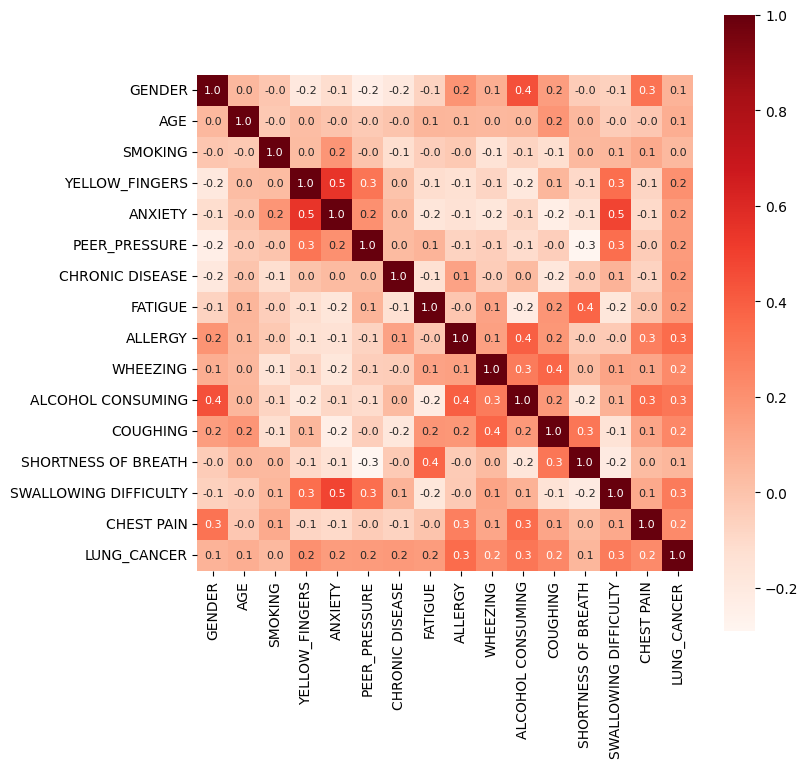

In [37]:
#find the correlation
numerical_df = df.select_dtypes(include=['number'])
correlation = numerical_df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [38]:
x=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']
print(x)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        0               1        1              0   
1         1   74        1               0        0              0   
2         0   59        0               0        0              1   
3         1   63        1               1        1              0   
4         0   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
276       0   62        1               1        1              1   
279       0   59        0               1        1              1   
280       0   59        1               0        0              0   
281       1   55        1               0        0              0   
283       1   60        0               1        1              0   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  0        1        0         1                  1         1   
1        

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Models

Logistic Regression

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.93      0.97      0.95        40

    accuracy                           0.91        46
   macro avg       0.84      0.74      0.78        46
weighted avg       0.91      0.91      0.91        46

Accuracy: 0.9130


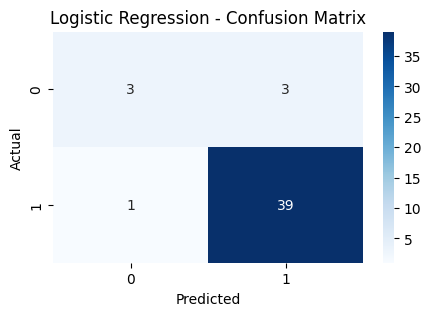

K-Nearest Neighbors

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.89      0.97      0.93        40

    accuracy                           0.87        46
   macro avg       0.69      0.57      0.59        46
weighted avg       0.84      0.87      0.84        46

Accuracy: 0.8696


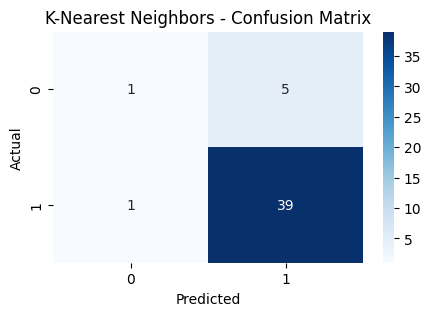

Support Vector Machine

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.87      1.00      0.93        40

    accuracy                           0.87        46
   macro avg       0.43      0.50      0.47        46
weighted avg       0.76      0.87      0.81        46

Accuracy: 0.8696


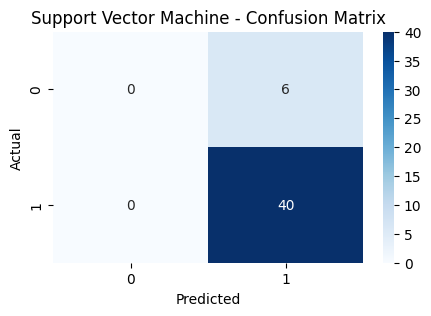

Random Forest

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.91      0.97      0.94        40

    accuracy                           0.89        46
   macro avg       0.79      0.65      0.69        46
weighted avg       0.88      0.89      0.88        46

Accuracy: 0.8913


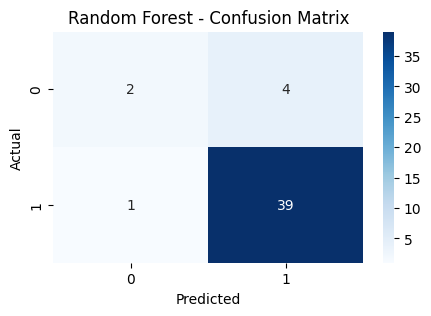

Gradient Boosting

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.91      0.97      0.94        40

    accuracy                           0.89        46
   macro avg       0.79      0.65      0.69        46
weighted avg       0.88      0.89      0.88        46

Accuracy: 0.8913


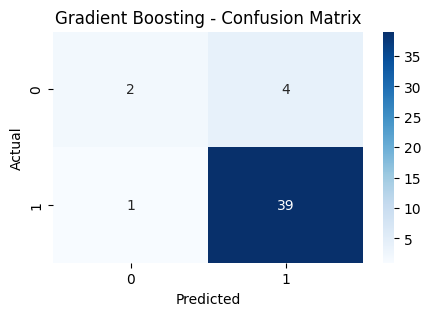

Neural Network

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.87      1.00      0.93        40

    accuracy                           0.87        46
   macro avg       0.43      0.50      0.47        46
weighted avg       0.76      0.87      0.81        46

Accuracy: 0.8696


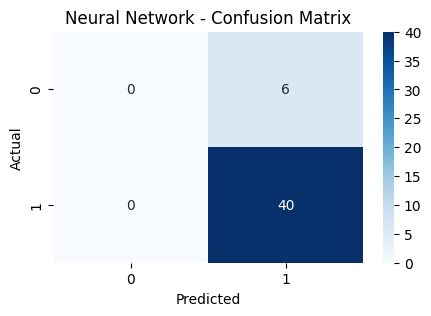


Model Accuracy Comparison:
Logistic Regression: 0.9130
K-Nearest Neighbors: 0.8696
Support Vector Machine: 0.8696
Random Forest: 0.8913
Gradient Boosting: 0.8913
Neural Network: 0.8696


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Dictionary to store the accuracy of each model
accuracy_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Hyperparameter tuning for Logistic Regression
    if model_name == 'Logistic Regression':
        param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [50, 75, 100, 200, 300, 400, 500, 700]}
        random_search_log = RandomizedSearchCV(model, param_grid_log, cv=5, random_state=42)
        random_search_log.fit(X_train, y_train)
        best_model = random_search_log.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_model = model
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    
    # Print evaluation report
    print(f"{model_name}\n")
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy:.4f}')
    
    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print all accuracy results
print("\nModel Accuracy Comparison:")
for model_name, accuracy in accuracy_results.items():
    print(f'{model_name}: {accuracy:.4f}')


Building a Predictive Model

In [41]:
from sklearn.preprocessing import StandardScaler
model =  LogisticRegression(random_state=42)
model.fit(X_train, y_train)
#Building a predictive model
input_data = (0,52,2,1,	1,	1,	1,	2,	1,	2,	2,	2,	2,	1,	2)

import numpy as np
#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are considering less value
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)

[1]


In [43]:
if(prediction[0]==1):
  print('Patient with Lung Cancer')
else:
  print("Patient without Lung Cancer")


Patient with Lung Cancer
